In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Input

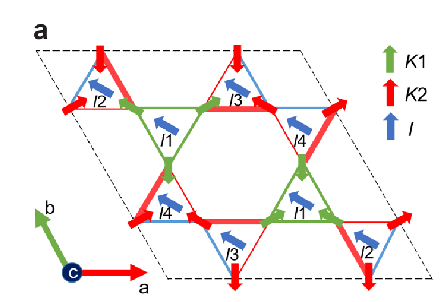

Ideal $q=0$ kagome structure. (Barlowite 2)

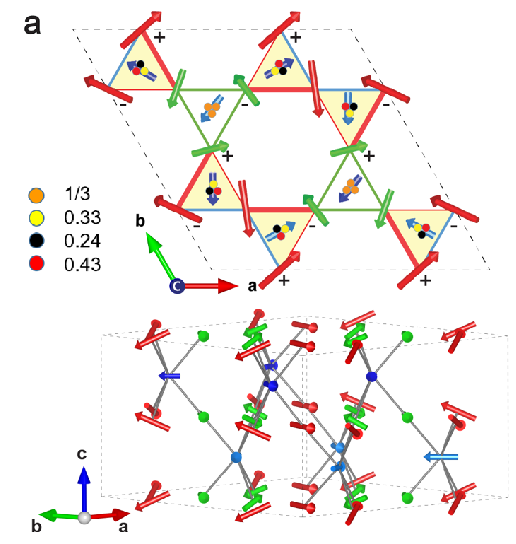

Actual structure

In [259]:
class Moment:
    def __init__(self, name, size, angle, pos_c):
        self.name = name
        self.size = size
        self.angle = angle
        self.pos_c = pos_c  # cartesian position

    def __repr__(self):
        return f"{self.name} {self.size} {self.angle} {self.pos_c}"

In [260]:
input_path = "input.txt"
moments = []
with open(input_path) as f:
    line_counter = 0
    basis_type = 0
    basis = []
    for line in f:
        if line[0] == "#":
            continue
        else:
            if line_counter < 3:
                basis.append(list(map(float, filter(None, line.strip().split(" ")))))
            elif line_counter == 3:
                if line[0] == "D":
                    basis_type = 0
                assert line[1] != "C", "Cartesian is not implemented!"

                basis = np.array(basis)
                print(basis.T)
            else:
                if basis_type == 0:
                    name, size, angle, pos_1, pos_2, pos_3 = list(filter(None, line.strip().split(" ")))
                    pos_c = np.matmul(basis.T, np.array([list(map(float, (pos_1, pos_2, pos_3)))]).T).T[0]
                    #print(np.array([list(map(float, (pos_1, pos_2, pos_3)))]).T)
                    print(pos_c)
                    moments.append(Moment(name, float(size), float(angle), pos_c))
            line_counter += 1

[[ 1.        -0.5        0.       ]
 [ 0.         0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[0.375      0.21650635 0.        ]
[0.625      0.21650635 0.        ]
[0.5       0.4330127 0.       ]
[0.125      0.64951905 0.        ]
[-0.125       0.64951905  0.        ]
[0.        0.4330127 0.       ]
[0.875      0.21650635 0.        ]
[0.625      0.64951905 0.        ]
[-0.375       0.64951905  0.        ]
[-0.125       0.21650635  0.        ]
[0.125      0.21650635 0.        ]
[0.375      0.64951905 0.        ]
[0.75 0.   0.  ]
[0.25      0.8660254 0.       ]
[-0.25       0.8660254  0.       ]
[0.25 0.   0.  ]
[0.5        0.28867513 0.        ]
[-5.00000041e-12  5.77350269e-01  0.00000000e+00]
[0.75       0.14433757 0.        ]
[-0.25        0.72168784  0.        ]
[0.25       0.14433757 0.        ]
[0.25       0.72168784 0.        ]
[0.5        0.57735027 0.        ]
[-5.00000041e-12  2.88675135e-01  0.00000000e+00]


In [261]:
scale_factor = 2 * np.pi * np.dot(basis[0, :], np.cross(basis[1, :], basis[2, :]))
reciprocal_basis = scale_factor * np.array([
    np.cross(basis[1, :], basis[2, :]),
    np.cross(basis[2, :], basis[0, :]),
    np.cross(basis[0, :], basis[1, :]),
])
reciprocal_basis

array([[ 4.71238898,  2.72069905, -0.        ],
       [ 0.        ,  5.44139809,  0.        ],
       [ 0.        , -0.        ,  4.71238898]])

In [262]:
def get_sf(Q):
    sf = sum(map(
        lambda moment : np.exp(1j * np.dot(Q, moment.pos_c)) * np.array([
            moment.size * np.cos(np.deg2rad(moment.angle)), 
            moment.size * np.sin(np.deg2rad(moment.angle))
        ]), 
        moments
    ))

    return sf

In [263]:
def get_S(Q):
    return np.sum(np.square(np.abs(get_sf(Q))))

In [264]:
sample_shape = (100, 100)
S_samples = np.empty(shape=sample_shape)
for n1 in range(sample_shape[0]):
    for n2 in range(sample_shape[1]):
        S_samples[n2, n1] = get_S(
            n1 / sample_shape[0] * reciprocal_basis[0, :] + 
            n2 / sample_shape[1] * reciprocal_basis[1, :]
        )


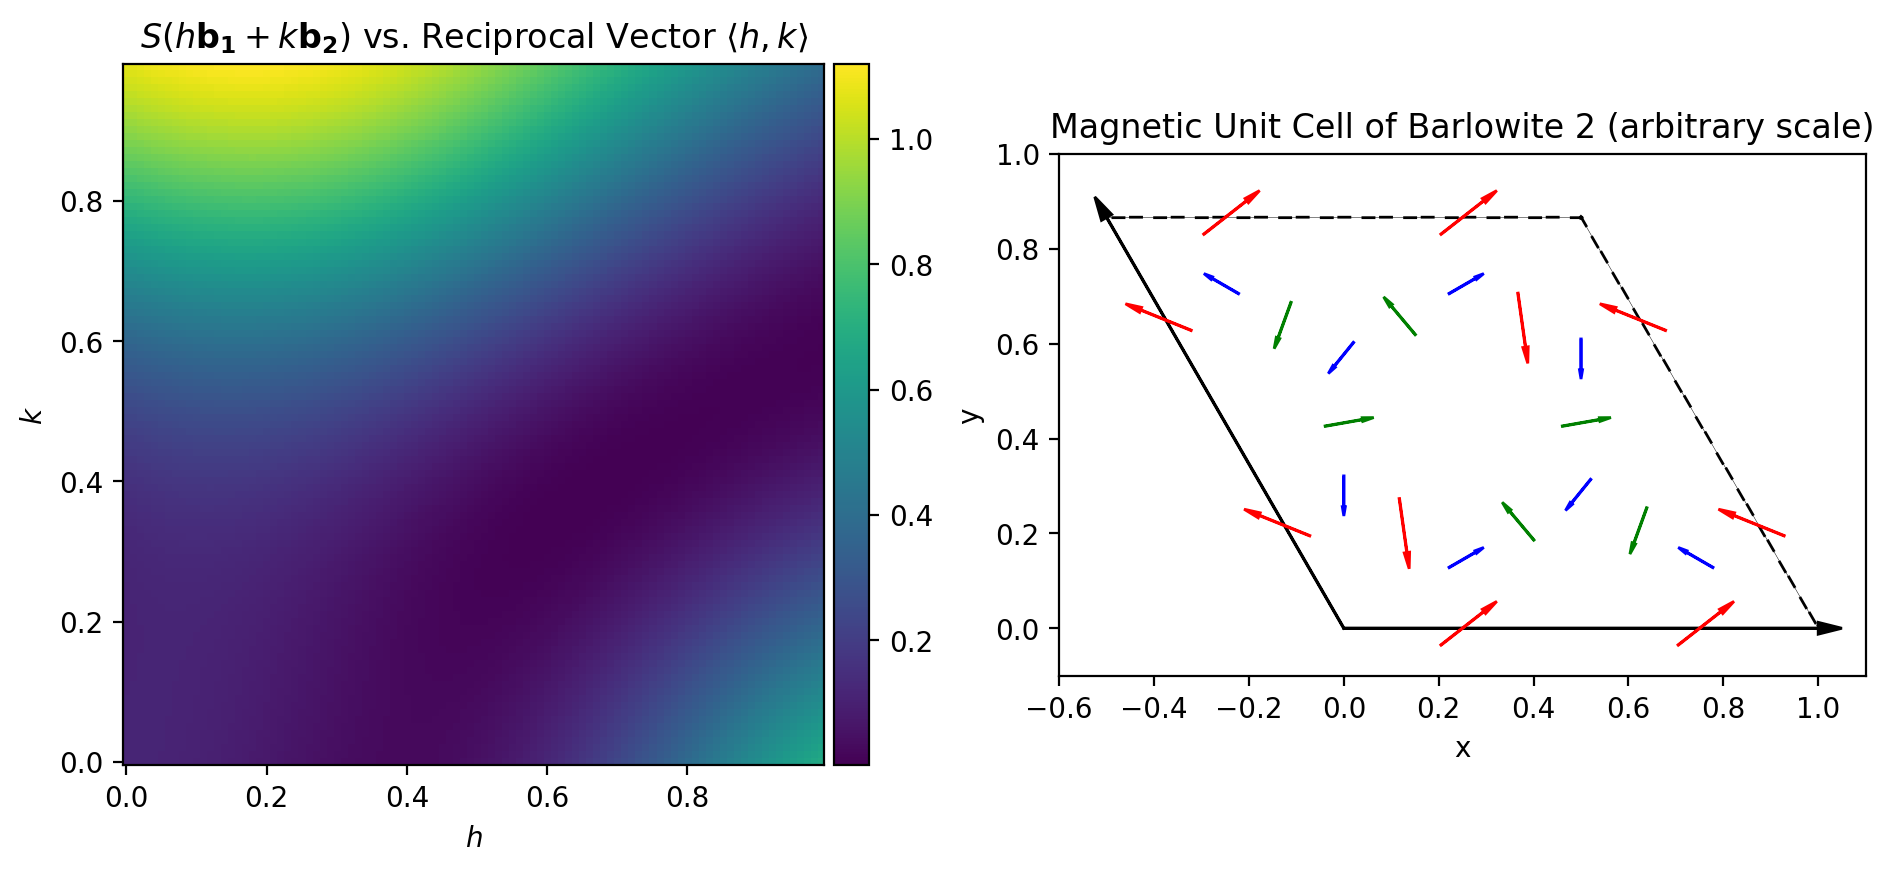

In [265]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(1, 2)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.tight_layout()
fig.set_size_inches(10, 4)
fig.set_dpi(200)
axs[0].set_xticks(np.arange(0, sample_shape[0], sample_shape[0] / 5), labels=np.arange(0, 5, 1) / 5)
axs[0].set_yticks(np.arange(0, sample_shape[1], sample_shape[1] / 5), labels=np.arange(0, 5, 1) / 5)
axs[0].set_xlabel(r"$h$")
axs[0].set_ylabel(r"$k$")
axs[0].set_title(r"$S(h\mathbf{b_1} + k\mathbf{b_2})$ vs. Reciprocal Vector $\langle h, k\rangle$")
s_im = axs[0].imshow(S_samples, origin="lower")
fig.colorbar(s_im, cax=cax, orientation='vertical')

axs[1].set_title(r"Magnetic Unit Cell of Barlowite 2 (arbitrary scale)")
axs[1].set_xlabel(r"x")
axs[1].set_ylabel(r"y")
axs[1].set_xlim((-0.6, 1.1))
axs[1].set_ylim((-0.1, 1.00))
axs[1].set_aspect('equal')
axs[1].arrow(0, 0, basis[0, 0], basis[0, 1], color='black', head_length=0.05, head_width=0.025)
axs[1].arrow(0, 0, basis[1, 0], basis[1, 1], color='black', head_length=0.05, head_width=0.025)
axs[1].arrow(basis[1, 0], basis[1, 1], basis[0, 0], basis[0, 1], color='black', ls=(0, (5, 10)))
axs[1].arrow(basis[0, 0], basis[0, 1], basis[1, 0], basis[1, 1], color='black', ls=(0, (5, 10)))
for moment in moments:
    if moment.name[:2] == "K1":
        color = "green"
    elif moment.name[:2] == "K2":
        color = "red"
    else:
        color = "blue"
    dx, dy = 0.5 * moment.size * np.cos(np.deg2rad(moment.angle)), 0.5 * moment.size * np.sin(np.deg2rad(moment.angle))
    axs[1].arrow(
        moment.pos_c[0] - dx / 2, moment.pos_c[1] - dy / 2, 
        dx, dy,
        color=color,
        head_length=.15 * moment.size, 
        head_width=.05 * moment.size,
    )